# Predicting High Blood Pressure Among US Adults

## Introduction to Problem & Data

### Problem Statement:

High blood pressure is a chronic condition, referred to as "the silent killer" because it is often undetected, unless tested (Columbia Doctors). High blood pressure can develop over time, especially from an inactive lifestyle: diabetes and obesity increase one's risk of high blood pressure (CDC). Nearly half of the US adult population suffers from high blood pressure, also known as hypertension (HHS). This diagnosis is particularly of high concern because it greatly elevates one's risk of a heart attack or stroke. In extreme causes, it can lead to heart failure.
It is important to predict individuals who are at higher risk of hypertension because of these related serious health risks. This is why in this project I chose to create a predictive model - because of this disease's elusive nature it is even more important to better anticipate high blood pressure individuals. An effective predictive model could allow both individuals and health care providers to anticipate a high blood pressure diagnosis through various characteristics, even if the individual has not directly sought out blood pressure testing. Even businesses/pharmaceutical companies might be able to better market treatment and remedies to individuals with greater likelihoods of the diagnosis. I will use characteristics such as age, BMI, and gender, to predict a high blood pressure diagnosis. I also plan to expand the independent variables to include more demographic characteristics, such as US region of residence and race, which could relate to a positive diagnosis in terms of one's lifestyle.
https://www.cdc.gov/high-blood-pressure/about/index.html
https://www.ncbi.nlm.nih.gov/books/NBK279239/
https://millionhearts.hhs.gov/data-reports/hypertension-prevalence.html
https://www.columbiadoctors.org/news/why-high-blood-pressure-known-silent-killer#:~:text=Medical%20professionals%20call%20high%20blood,determine%20if%20someone%20has%20it.
https://pmc.ncbi.nlm.nih.gov/articles/PMC2643192/




### Dataset Description:

The data is sourced from AHRQ's (the Agency for Healthcare Research and Quality) Medical Expenditure Panel Survey (or MEPS). It is a collection of data/surveys from individuals, families, health care providers, and employers. The data is collected from all across the country and my particular dataset, from 2022, has 20,432 data entries.

A challenge I anticipate is which features to focus on, as the surveys include 1,419 characteristic columns. Thus, I have to use some background knowledge on high blood pressure causes to narrow my scope of factors down.
I must also adjust certain variable responses, as some include data unnecessary for the scope of my project (e.g. "Don't Know," "Refused, "Inapplicable").
https://meps.ahrq.gov/mepsweb/data_stats/download_data_files_codebook.jsp?PUFId=H243



### Data Pre-Processing & Preliminary Examination:

In [1]:
pip install pandas

In [2]:
import pandas as pd

In [3]:
#Reading in data as an Excel file (because a CSV file cuts off the data)
df = pd.read_excel('/content/h243.xlsx', sheet_name = 'H243')

In [4]:
print(df.head())

      DUID  PID    DUPERSID  PANEL  DATAYEAR FAMID31 FAMID42 FAMID53 FAMID22  \
0  2460002  101  2460002101     24      2022       A       A       A       A   
1  2460006  101  2460006101     24      2022       A       A       A       A   
2  2460006  102  2460006102     24      2022       A       A       A       A   
3  2460010  101  2460010101     24      2022       A       A       A       A   
4  2460018  101  2460018101     24      2022       A       A       A       A   

  FAMIDYR  ... RXOSR22  RXPTR22  RXOTH22      PERWT22F      FAMWT22F  \
0       A  ...       0        0        0   5728.309495   5232.211986   
1       A  ...       0        0        0  15648.881461  16017.881691   
2       A  ...       0        0        0  14123.720178  16017.881691   
3       A  ...       0     5288      299  16982.054917  21905.758877   
4       A  ...       0       10        0  10682.619947  11344.291012   

       FAMWT22C      SAQWT22F     DIABW22F  VARSTR  VARPSU  
0   5232.211986   3994.68

In [5]:
#Filtering the dataframe to just include U.S. Adults
df = df[df['AGELAST'] >= 18]

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18101 entries, 0 to 22430
Columns: 1420 entries, DUID to VARPSU
dtypes: float64(19), int64(1390), object(11)
memory usage: 196.2+ MB


In [8]:
df['DUID'].max()

2799700

In this stage of pre-processing, I have also filtered the data frame to just include U.S. Adults, of 18 years or older.


## Exploratory Data Analysis

### Descriptive Statistics

In [9]:
#Filtering High Blood Pressure Diagnosis to remove 'DON'T KNOW'
#'REFUSED,' and 'INAPPLICABLE'
df = df[df['HIBPDX'].isin([1, 2])]

In [10]:
#Counting the number of 1s - yes high blood pressure diagnosis
# and 2s - no high blood pressure diagnosis
bp_count = df['HIBPDX'].value_counts()
print(bp_count)

HIBPDX
2    11082
1     6788
Name: count, dtype: int64


In [11]:
#Proportion of those with high blood pressure
bp_proportion = 6788/(11082 + 6788)
print(bp_proportion)

0.3798545047565753


In this dataset, there are 6,788 individuals (>17) who responded "yes" to being diagnosed with High Blood Pressure. These positive, or "yes", responses equate to roughly 38% of those who responded to the blood pressure survey. There is a count of 11,082 who responded "no," which covers the remaining 62% of the relevant responders.

In [12]:
#Calculating max age in dataset
df['AGELAST'].max()

85

In [13]:
#Calculating average age in dataset
df['AGELAST'].mean()

51.99205372132065

Text(0.5, 1.0, 'Distribution of Ages')

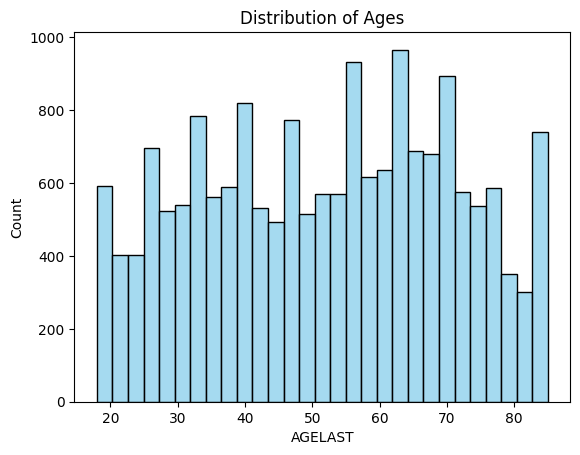

In [14]:
sns.histplot(data = df, x = 'AGELAST', color = 'skyblue')
plt.title('Distribution of Ages')

In [15]:
#Filtering Adult BMI to remove 'CANNOT BE COMPUTED'
#and 'INAPPLICABLE
df = df[df['ADBMI42'] > 0]

In [16]:
#Minimum BMI in dataset
df['ADBMI42'].min()

11.5

In [17]:
#Highest BMI in dataset
df['ADBMI42'].max()

50.0

In [18]:
#Average BMI in dataset
df['ADBMI42'].mean()

28.61218360408009

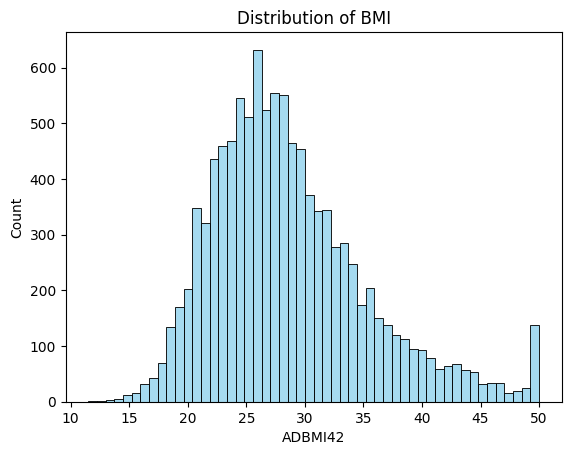

In [19]:
sns.histplot(data = df, x = 'ADBMI42', color = 'skyblue')
plt.title('Distribution of BMI');

The descriptive statistics show that the individuals considered in this project will be, on average, older as the distribution of ages is slightly skewed left. The oldest age in the data is 85. As for BMIs, the distribution skews to the right. The lowest BMI in the data is 10 while the highest is 50. Some important background on BMIs is that "Normal Weight" individuals score between 18.5 and 24.9 (NIH). Considering that this distribution skews right, this indicates that many in our dataset are Overweight or Obese.
https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm



### Initial Visualizations

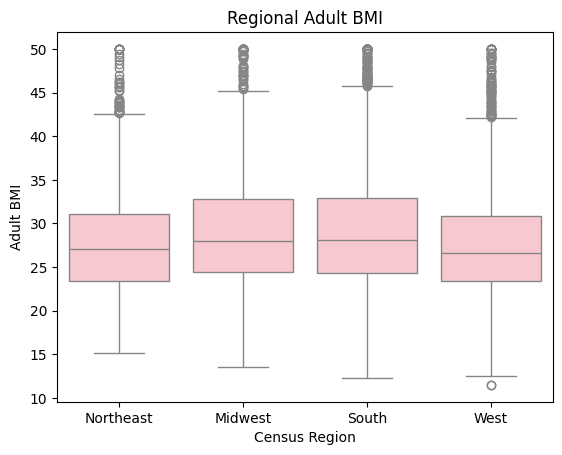

In [20]:
#Visualizing BMI by region
sns.boxplot(data = df, x = 'REGION22', y = 'ADBMI42', color = 'pink')
plt.title('Regional Adult BMI')
plt.xlabel('Census Region')
plt.ylabel('Adult BMI')
plt.xticks(ticks = [0, 1, 2, 3], labels = ['Northeast', 'Midwest', 'South', 'West']);

This box plot above demonstrates that individuals located in the Midwest or South may be more likely to suffer from a higher BMI score (higher median and upper quartile range). This could be for a plethora of reasons, such as lifestyle or access to healthcare. These regions should be further considered, as a high BMI is related to high blood pressure.


In [21]:
#Splitting by blood pressure diagnosis
region_bp_count = df.groupby('REGION22')['HIBPDX'].value_counts().unstack()
print(region_bp_count)

HIBPDX       1     2
REGION22            
1          681   937
2          966  1334
3         1892  2168
4          976  1634


In [22]:
df['HIBPDX'] = df['HIBPDX'].replace({1: 'Yes High BP', 2: 'No High BP'})

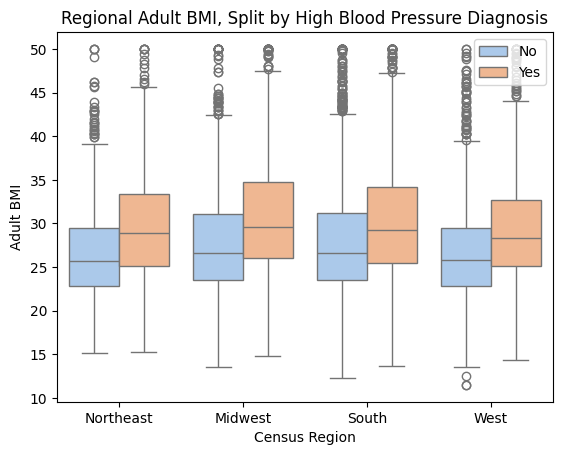

In [87]:
#Visualizing Blood Pressure Diagnosis by Region
#Added Get Handles (boxes) labels portion because of trouble with assigning
#proper legend colors
sns.boxplot(data = df, x='REGION22', y = 'ADBMI42', hue = 'HIBPDX', palette = 'pastel')
plt.title('Regional Adult BMI, Split by High Blood Pressure Diagnosis')
plt.xlabel('Census Region')
plt.ylabel('Adult BMI')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['No', 'Yes']
plt.legend(handles=handles, labels=new_labels, loc='upper right')
plt.xticks(ticks = [0, 1, 2, 3], labels = ['Northeast', 'Midwest', 'South', 'West']);

This boxplot above supports my earlier argument, that those diagnosed with High Blood Pressure tend to have higher BMIs -- in this visualization, the orange boxplots, indicating a High Blood Pressure diagnosis, tend to have a higher range and median in terms of BMI.


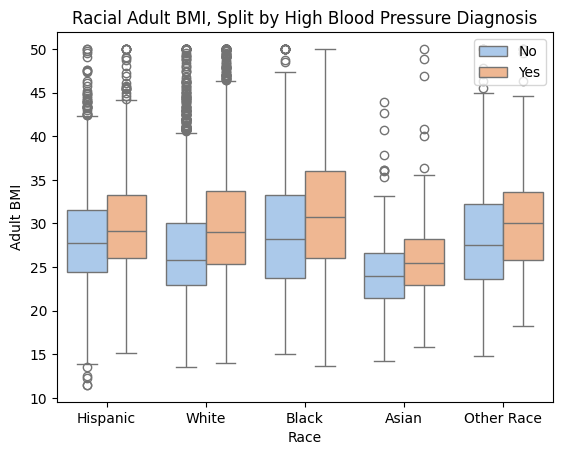

In [88]:
#Visualizing BMI by Race and BMI
sns.boxplot(data = df, x='RACETHX', y = 'ADBMI42', hue = 'HIBPDX', palette = 'pastel')
plt.title('Racial Adult BMI, Split by High Blood Pressure Diagnosis')
plt.xlabel('Race')
plt.ylabel('Adult BMI')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['No', 'Yes']
plt.legend(handles=handles, labels=new_labels, loc='upper right')
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['Hispanic', 'White', 'Black', 'Asian', 'Other Race']);

In [25]:
df['HIBPDX'] = df['HIBPDX'].replace({'Yes High BP': 1, 'No High BP': 2})

<ipython-input-25-f2c8812d52e8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HIBPDX'] = df['HIBPDX'].replace({'Yes High BP': 1, 'No High BP': 2})


In the box plot above, across all races the trend of higher BMI correlating with a higher blood pressure diagnosis is maintained. Furthermore, this boxplot visualization shows that Black individuals tend to have higher BMIs than the other races (they have a higher median and upper quartile range).


In [26]:
#Grouping by Race and High Blood Pressure Diagnosis
race_bp_counts = df.groupby(['RACETHX', 'HIBPDX']).size().unstack(fill_value = 0)

In [27]:
#Changing to Percentage of total race category
race_bp_percentages = race_bp_counts.div(race_bp_counts.sum(axis =1), axis = 0) * 100

In [28]:
print(race_bp_percentages)

HIBPDX           1          2
RACETHX                      
1        30.778515  69.221485
2        43.938040  56.061960
3        56.657019  43.342981
4        26.978417  73.021583
5        43.727599  56.272401


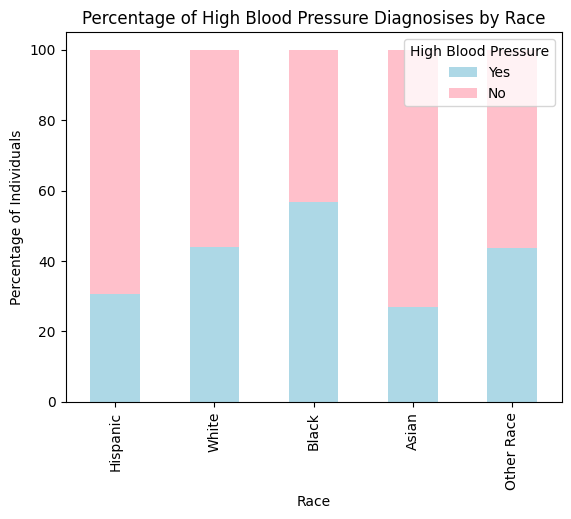

In [29]:
#Visualizing Blood Pressure Diagnosis Splits by Race
race_bp_percentages.plot(kind = 'bar', stacked = True, color = ['lightblue', 'pink'])
plt.legend(title = 'High Blood Pressure', labels = ['Yes', 'No'], loc = 'upper right')
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['Hispanic', 'White', 'Black', 'Asian', 'Other Race'])
plt.title('Percentage of High Blood Pressure Diagnosises by Race')
plt.xlabel('Race')
plt.ylabel('Percentage of Individuals');

As seen in the bar plot above, individuals identifying as Black have the highest prevalence of blood pressure. This is a further elaboration on my earlier visualization, where Black people, on average, have the highest BMI than other race groups in the dataset.


In [30]:
#Filtering for  just those with high blood pressure
df_yes_bp = df[df['HIBPDX'] == 1]

Text(0, 0.5, 'Count of High Blood Pressure Individuals')

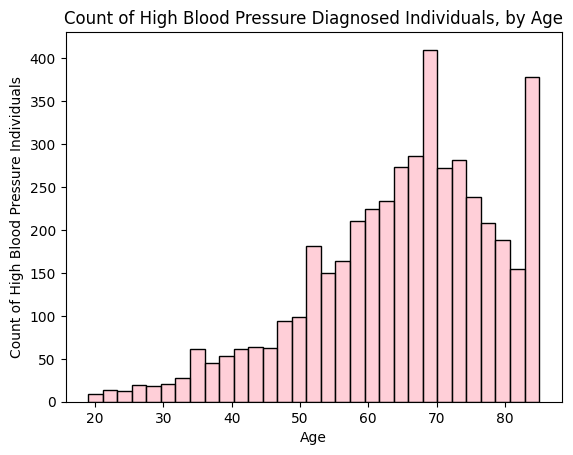

In [31]:
#Looking at count of high blood pressure individuals by age
sns.histplot(df_yes_bp['AGELAST'], kde = False, color = 'pink')
plt.title('Count of High Blood Pressure Diagnosed Individuals, by Age')
plt.xlabel('Age')
plt.ylabel('Count of High Blood Pressure Individuals')

When reviewing the bar chart above, there is a clear positive relationship between age and high blood pressure diagnoses (in terms of count).




In [32]:
#Grouping by Gender and High Blood Pressure Diagnosis
gender_bp_counts = df.groupby(['SEX', 'HIBPDX']).size().unstack(fill_value = 0)

In [33]:
#Changing to Percentage of total gender category
gender_bp_percentages = gender_bp_counts.div(gender_bp_counts.sum(axis =1), axis = 0) * 100

In [34]:
print(gender_bp_percentages)

HIBPDX          1          2
SEX                         
1       44.246862  55.753138
2       41.322314  58.677686


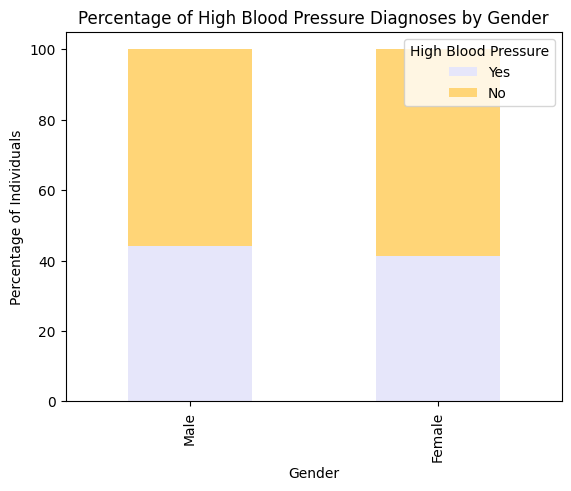

In [89]:
#Visualizing Blood Pressure Diagnosis Splits by Race
gender_bp_percentages.plot(kind = 'bar', stacked = True, color = ['lavender', '#FFD577'])
plt.legend(title = 'High Blood Pressure', labels = ['Yes', 'No'], loc = 'upper right')
plt.xticks(ticks = [0, 1], labels = ['Male', 'Female'])
plt.title('Percentage of High Blood Pressure Diagnoses by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Individuals');

While these two bar splits look comparable, the table above indicates that Male individuals have a greater percentage with High Blood Pressure.


## Modeling & Interpretations

In my predictive models, I will be prioritizing specificity, calculated as TP/(TP+FN), where I will be aiming to minimize False Negatives and maximize True Positives. Therefore, specificity scores that are higher are the goal. I am aiming to avoid False Negatives as they mean leaving those with High Blood Pressure undiagnosed, and therefore, untreated. I will also be measuring accuracy through ‘.score,’ as it tells me what percentage of the predictions accurately capture the True Positives and the True Negatives. Another note for my models is that I will be using a Train-Test Split, where I will be splitting the data into 75% training and the remaining 25% as the testing set.
(Specificity, as defined in Chapter 7, Decision Analytic Thinking I: What is a Good Model?)



In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression

### Baseline Model

To see how much my different regression models improve upon a baseline, I will calculate the average High Blood Pressure score. Essentially I am using a raw probability as my baseline.


In [37]:
df['HIBPDX'] = df['HIBPDX'].replace({1:1, 2:0})

In [38]:
1 - df['HIBPDX'].mean()

0.5735738571968265

This baseline shows that I should expect 57.4% of individuals in the data to not be diagnosed with high blood pressure. That being said, this baseline also shows that the baseline is only correct 57.4% of the time. So any models that result in a higher percentage accuracy than this have improved upon the baseline.

### Multiple Regression Model

When choosing between linear and logistic regression as my model, I decided on logistic regression. Logistic regression is better suited for the binary nature of my problem (whether the individuals do or do not have high blood pressure).

In [39]:
#Setting X and y
X = df[['AGELAST', 'ADBMI42', 'REGION22', 'RACETHX', 'SEX']]
y = df['HIBPDX']

In [40]:
#Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

In [41]:
#Encoding Categorical Columns
cat_cols = ['REGION22', 'RACETHX', 'SEX']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_cols), remainder = 'passthrough')

In [42]:
logistic_pipe = Pipeline([
    ('encode', transformer),
    ('model', LogisticRegression())
])

In [43]:
logistic_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppr

Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['REGION22', 'RACETHX',
                                                   'SEX'])])),
                ('model', LogisticRegression())])

In [44]:
logistic_pipe.score(X_train, y_train)

0.7378163959199093

In [45]:
logistic_pipe.score(X_test, y_test)

0.7434831885153004

This logistic regression has a much improved score on the baseline, with 73% accuracy for the training data and 74% accuracy with the test.

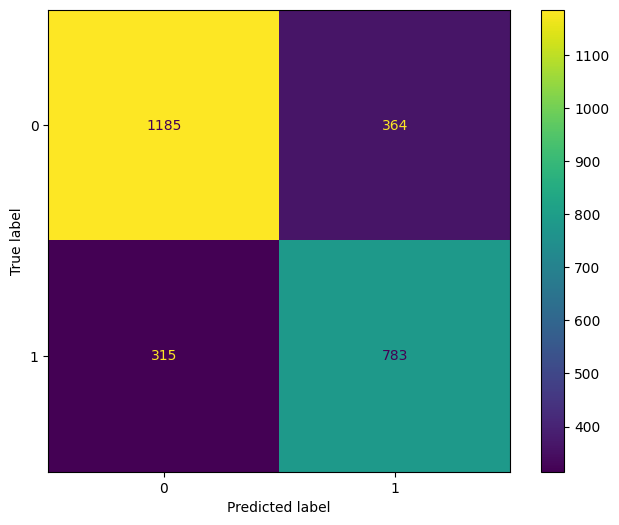

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(logistic_pipe, X_test, y_test, ax = ax)
plt.show()

In [47]:
#Calculating Specificity
(783)/(783+315)

0.7131147540983607

Upon reviewing the Confusion Matrix, and corresponding specificity score, it shows that logistic regression is relatively good at predicting High Blood Pressure patients (71.3% specificity score). More specifically, in this case there are only 315 False Negatives. But to know if this is actually the best model, I will compare across other models which also fit a Confusion Matrix display to see if False Negatives can be further minimized.

### K-Nearest Neighbors Regression Model

In [48]:
knn_pipe = Pipeline([
    ('encode', transformer),
    ('model', KNeighborsClassifier(n_neighbors = 5))
])

In [49]:
knn_pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['REGION22', 'RACETHX',
                                                   'SEX'])])),
                ('model', KNeighborsClassifier())])

In [50]:
knn_pipe.score(X_train, y_train)

0.791839818662637

In [51]:
knn_pipe.score(X_test, y_test)

0.6936154136758594

This K-Nearest Neighbors Model did improve on the baseline model, with 79.2% accuracy on the training data and 69.4% on the testing. However, the KNN testing data’s accuracy did not improve upon the logistic regression model’s score.


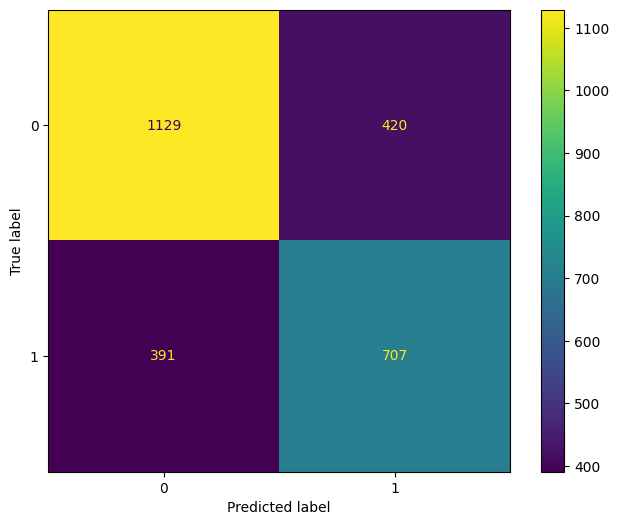

In [52]:
Fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_test, y_test, ax = ax)
plt.show()

In [53]:
#Calculating Specificity
(707)/(707+391)

0.6438979963570127

Here, using K-Nearest Neighbors, it seems the model has a Specificity Score of 64.4%. It seems that Logistic Regression is more specific with a score of 71.3%. So far, Logistic Regression seems to be superior in terms of the testing data.


### Decision Tree Model

In [54]:
dt_model = DecisionTreeClassifier(random_state= 40)

In [55]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [56]:
dt_model.score(X_train, y_train)

0.9880367711875079

In [57]:
dt_model.score(X_test, y_test)

0.6358141292028712

The testing data had an accuracy score of 63.4%, which is better than the baseline but worse than both the Logistic Regression and K-Nearest Neighbors models.


In [58]:
y_pred_dt = dt_model.predict(X_test)

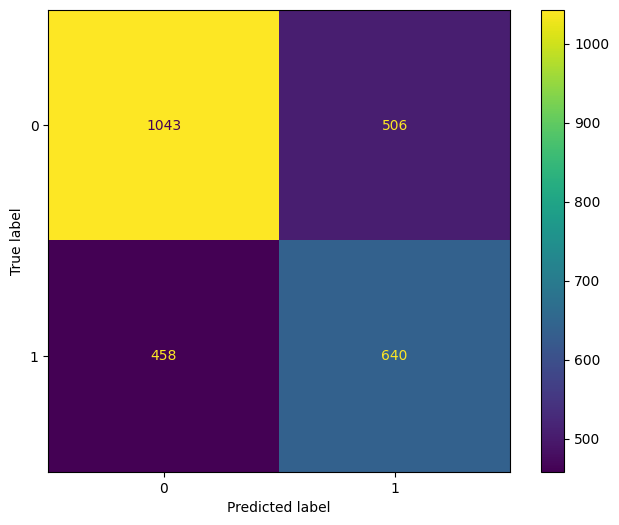

In [59]:
Fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test, ax = ax)
plt.show()

In [60]:
#Calculating Specificity
(640)/(640+458)

0.5828779599271403

The Decision Tree Model has a specificity score of 58.3%, using the Confusion Matrix results from above. This is worse than both the Logistic Regression and K-Nearest Neighbors’ specificity scores of 71.3% and 64.4%, accordingly.


### Random Forest Model

In [61]:
random_forest_pipe = Pipeline([('encode', transformer), ('model', RandomForestClassifier())])

In [62]:
params = {'model__n_estimators': [10, 100, 400],
          'model__max_depth': [1,2,3]}

In [63]:
grid_search = GridSearchCV(random_forest_pipe, cv = 5, param_grid = params)

In [64]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['REGION22',
                                                                          'RACETHX',
                                                                          'SEX'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [1, 2, 3],
                         'model__n_estimators': [10, 100, 400]})

In [65]:
grid_search.best_params_

{'model__max_depth': 3, 'model__n_estimators': 400}

In [66]:
forest = grid_search.best_estimator_

In [67]:
forest.score(X_train, y_train)

0.7342903916383327

In [68]:
forest.score(X_test, y_test)

0.7204382319607102

The Random Forest Model does improve upon the Decision Tree Model and K-Nearest Neighbors’ scores, in terms of testing data (the Random Forest Model saw an accuracy of 71.6% while the Decision Tree Model saw 63.4% and KNN saw 69.4%). That being said, the Logistic Regression Model still remains the most accurate with the highest score of 74.3%.



In [69]:
rf_model = RandomForestClassifier(n_estimators = 400, random_state = 40)

In [70]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400, random_state=40)

In [71]:
y_pred_rf = rf_model.predict(X_test)

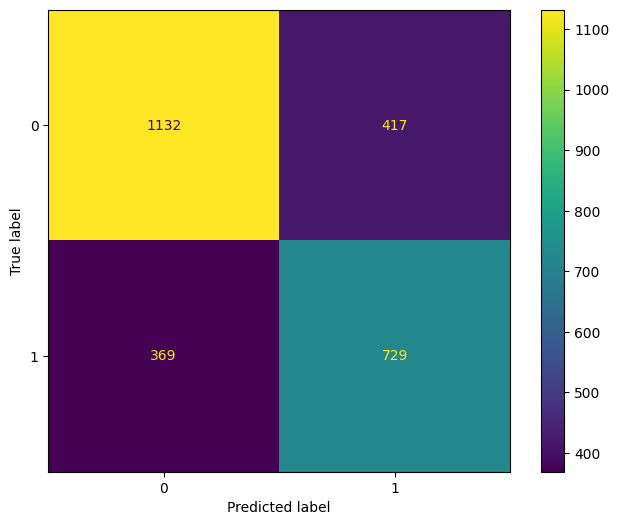

In [72]:
Fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, ax = ax)
plt.show()

In [73]:
#Calculating Specificity
(729)/(729+369)

0.6639344262295082

The Random Forest model sees a specificity score of 66.4%. While this does improve upon the Decision Tree Model and K-Nearest Neighbor models’ specificity scores, it remains lower than the Logistic Regression Model.


Considering that my Logistic Regression Model seems to fare the best, in terms of accuracy and specificity, I want to determine which features this model sees as 'most important.'

In [74]:
lg_model = logistic_pipe.named_steps['model']

In [75]:
#Pulling Coefficients
coefficients = lg_model.coef_[0]

In [76]:
feature_names = transformer.get_feature_names_out()

In [77]:
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Value Coefficient': abs(coefficients)
})

In [78]:
#Sorting to see importance
coef_df = coef_df.sort_values(by = 'Absolute Value Coefficient', ascending = False)

In [79]:
print(coef_df)

                     Feature  Coefficient  Absolute Value Coefficient
4   onehotencoder__RACETHX_3     0.829953                    0.829953
6   onehotencoder__RACETHX_5     0.324441                    0.324441
7       onehotencoder__SEX_2    -0.270744                    0.270744
1  onehotencoder__REGION22_3     0.208415                    0.208415
5   onehotencoder__RACETHX_4     0.115717                    0.115717
9         remainder__ADBMI42     0.091730                    0.091730
8         remainder__AGELAST     0.073971                    0.073971
2  onehotencoder__REGION22_4    -0.068492                    0.068492
0  onehotencoder__REGION22_2     0.062100                    0.062100
3   onehotencoder__RACETHX_2     0.011954                    0.011954


According to the coefficients, Race is a very important feature, with identifying as “Black,” “Other Race,” or “Asian” being in the top 5 features ranked. Being male also seems to play a significant role in terms of features, as well as residing in the South. Finally, while it did not make the top 5, BMI is another important factor in influencing one’s likelihood to have High Blood Pressure.


# Next Steps & Discussion
## Summary of Findings

All of my chosen models – Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest – improved upon my Baseline Accuracy score. In terms of the best model, I found that the Logistic Regression Model was the best at predictions: it resulted in the highest accuracy score as well as the highest score of specificity, by maximizing True Positives and, through this, minimizing False Negatives.




Key Findings:

*   Logistic Regression Model: Proving that Logistic Regression is the best model, indicates that the data is quite linearly separable. This makes sense seeing that most of the features I considered are binary, with the exception of age and BMI.
*  Influence of BMI: In my early visualizations, it did become apparent that across all races and regions, those diagnosed with High Blood Pressure tended to have higher BMI medians and upper quartile ranges (shown in the box plots). This relationship was further confirmed when I did an assessment of my Logistic Regression’s feature importance – BMI was ranked #6 in terms of feature importance.
*   Influence of Racial Identity: Three of the top five important features came from the RACETHX feature. For my own research, seeing how racial identity in the surveys most strongly affected High Blood Pressure diagnoses was an unexpected result. I anticipated age or BMI would rank higher, as these seem more closely related to health issues. So a key finding in this result is the influence of lifestyle or perhaps health care access, related to one’s race.


In summary, I found that the Logistic Regression Model was most effective at capturing and predicting the linearly separable nature of High Blood Pressure diagnoses. Features that most strongly affected the predictions in this model were one’s race, sex, and region of residence. These particular features also appear to relate to one’s lifestyle — for example, one’s race could affect cultural food consumed or perspective on the healthcare system. In terms of region, cuisines vary across the U.S., as well as exercise habits. These top features were closely followed by BMI, which I had anticipated to be a close relationship early on in my research (shown in the visualization portion of this project). In terms of takeaways for health care providers or individuals, this Logistic Regression model and its conclusions indicate there should be a close monitoring of those likely to have High Blood Pressure issues: older, Black, higher BMI, and residing in the South.




## Next Steps/Improvements
If I had more time or further available data, I think it would be interesting to look at the following to increase the depth of my High Blood Pressure analysis:


*   High Blood Pressure rates over time:
I would love to explore how rates of hypertension in the U.S. have changed over time – have they increased as nutrition and food ingredient qualities have declined? Or has health care technology improved, thus lowering the rate?


*   High Blood Pressure costs:
I would also be curious to explore more financial and/or insurance data to understand the financial burden of the disease


*   Lifestyle by Region, Race, and Gender:
After understanding that these are the three most ‘important’ features used in the Logistic Regression Model (the features with the greatest coefficients), I would want to explore if my assumptions about lifestyle are reflected in the data. For example, I assume that the reason those in the South are generally more prone to the High Blood Pressure diagnosis is due to the fact that cuisine in the South tends to be heavier. If there was data to measure such lifestyle factors to better attribute the cause, that would further my arguments.

*  Assessing Feature Importance: One thing I considered in my data is adjusting the BMI and age features to be dummy variables, as they differ from the other features in their continuous nature. In practice, BMI could have been 0 - not obese, and 1 - obese; age as 0 - 50 or younger, 1 - 50 or older. That being said, I thought these cutoffs were too blunt and I wanted to keep the data more granular. But that could be a ‘next step’ to try in my data if I wanted to continue different types of assessments. This adjustment might also affect these features’ rank of importance; by keeping these features as continuous, their wider range might dilute their importance in the model.


By exploring these ‘next steps,’ I would better be able to highlight the gravity of High Blood Pressure diagnoses; e.g., if the rates are increasing over time it is even more important that one’s diagnosis is monitored, or if costs incurred are heavy burdens then perhaps these individuals need more financial support. In terms of understanding feature importance, this could better attribute the direct causes for increasing rates of High Blood Pressure, and thus, provide actionable feedback to individuals trying to prevent higher blood pressure rates.
